In [ ]:
'''
Name: Om Kadam
Class: EXTC-A
Batch: TA-3
Roll No: 45
Semester: V
Date: 05-10-2023
Time: 15:00
'''

### Design of IIR Butterworth Filter using ChebyShev

##### Problem Statement: Design Digital Butterworth Filter for following specifications using ChebyShev. Assume T = 1sec
##### Specifications:
##### 0.8 <= |H(e^jw| <= 1         0 <= w <= 0.2pi
#####        |H(e^jw| <= 0.2       0.5 <= w <= pi

In [16]:
# Importing in-built libraries
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as control
import scipy.signal as signal

In [17]:
# Given data
T = 1
d1 = 0.8
d2 = 0.2
wp = 0.2 * np.pi
ws = 0.5 * np.pi
print(wp)
print(ws)

0.6283185307179586
1.5707963267948966


In [18]:
d1db = -20 * np.log10(d1)
d2db = -20 * np.log10(d2)

In [19]:
# Frequency Mapping
omegap = (2/T) * np.tan(wp/2)
omegas = (2/T) * np.tan(ws/2)
print(omegap)
print(omegas)

0.6498393924658126
1.9999999999999998


In [20]:
# Determining Order of the Filter
N,wc = signal.cheb1ord(omegap, omegas, d1db, d2db, analog=True)
print('Order of Filter = ', N)
print(wc)

Order of Filter =  2
0.6498393924658126


In [21]:
# Determining Analog T.F H(s)
num,den = signal.cheby1(N, 5, wc, btype = 'lowpass', analog = True)
trans1 = control.tf(num,den)
print('Analog Transfer Function of Butterworth filter H(s) = ', trans1)

Analog Transfer Function of Butterworth filter H(s) =  
        0.1436
-----------------------
s^2 + 0.2973 s + 0.2553



In [22]:
# Transforming Analog Filter to Digital Filter using BLT
num1, den1 = signal.bilinear(num, den, T)
trans2 = control.tf(num1, den1)
print('Digital Transfer Function of Butterworth filter H(z) = ', trans2)

Digital Transfer Function of Butterworth filter H(z) =  
0.02961 s^2 + 0.05921 s + 0.02961
---------------------------------
     s^2 - 1.544 s + 0.7548



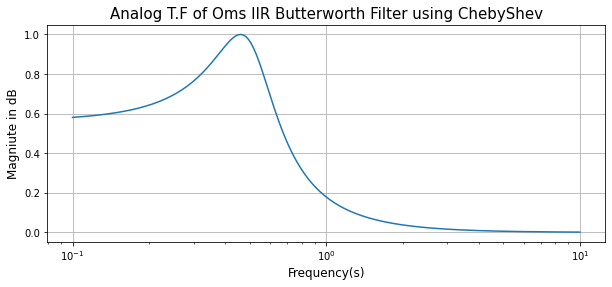

In [25]:
# Plotting Analog T.F
w, h = signal.freqs(num, den)
h_db = np.abs(h)
plt.figure(figsize = (10,4))
plt.grid()
plt.xlabel('Frequency(s)', fontsize=12)
plt.ylabel('Magniute in dB', fontsize=12)
plt.title('Analog T.F of Oms IIR Butterworth Filter using ChebyShev', fontsize=15)
plt.semilogx(w, h_db)
plt.show()

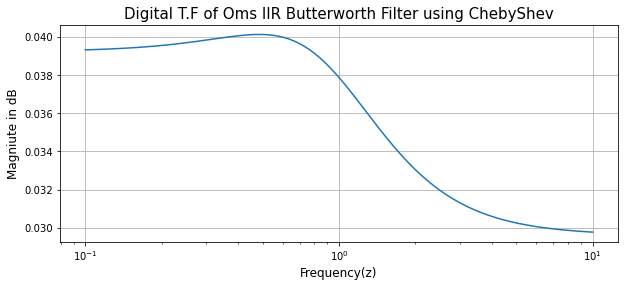

In [26]:
# Plotting Digital T.F
w1, h1 = signal.freqs(num1, den1)
h1_db = np.abs(h1)
plt.figure(figsize = (10,4))
plt.grid()
plt.xlabel('Frequency(z)', fontsize=12)
plt.ylabel('Magniute in dB', fontsize=12)
plt.title('Digital T.F of Oms IIR Butterworth Filter using ChebyShev', fontsize=15)
plt.semilogx(w1, h1_db)
plt.show()